# Analysis:

In [195]:
from itertools import islice
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline
plt.style.use('seaborn-whitegrid')
from all_graphs import *

In [196]:
df = pd.read_csv('../data/use_for_analysis.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
len(df)

2243

In [197]:
df['time_used'] = round((df['time_used']/df['game_time'])*100)
df['opp_time_used'] = round((df['opp_time_used']/df['game_time'])*100)
df = df[df['time_used'] <= 100]
df = df[df['opp_time_used'] <= 100]
len(df)

2199

In [198]:
bin_opp_elo = [650, 1050, 1150, 1250, 1350, 1450, 1650, 1750, 1850]
bin_opp_elo.extend(list(range(660, 1041, 10)))
bin_opp_elo = sorted(bin_opp_elo)

In [199]:
bin_diff = [-500, -400, -300, -200, -100, 100, 200, 300, 400, 500, 600]
bin_diff.extend(list(range(-90, 91, 5)))
bin_diff = sorted(bin_diff)

In [200]:
df['bin_elo'] = pd.cut(x=df.elo, bins=list(
    range(650, 1051, 10)), labels=list(range(650, 1041, 10))).astype(int)
df['bin_opp_elo'] = pd.cut(
    x=df.opp_elo, bins=bin_opp_elo, labels=bin_opp_elo[:-1]).astype(float)
df['bin_diff'] = pd.cut(x=df['diff'], bins=bin_diff,
                        labels=bin_diff[:-1]).astype(float)
df['bin_num_moves'] = pd.cut(x=df.num_moves, bins=list(
    range(0, 151, 5)), labels=list(range(0, 146, 5))).astype(float)
df['bin_time_used'] = pd.cut(x=df.time_used, bins=list(
    range(0, 101, 5)), labels=list(range(0, 96, 5))).astype(float)
df['bin_opp_time_used'] = pd.cut(x=df.opp_time_used, bins=list(
    range(0, 101, 5)), labels=list(range(0, 96, 5))).astype(float)

### My chances of winning are above 55% at:
6 AM, 10 AM, and 3 PM

### My chances of winning are below 45% at:
12 AM, 2 AM (0-3), 5 PM, 7 PM, and 10 PM

### My chances of winning are above 55% on:
3rd, 7th, 9th, 10th, 17th, and the 28th of the month

### My chances of winning are below 45% on:
4th, 8th, 25th, 27th, and the 30th of the month

### The best day to play is:
Thursday

### The worst day to play is:
Friday

### My chances of winning increase by 5% if I castle King-side v. if I castle Queen-side

### My chances of winning increase by 10%+ if opponent doesn't castle!!

### My chances of winning are 6% higher if I play with white pieces

### I usually win by my opponent resigning or abandoning the game. Which is fairly typical once the other player knows the game is over

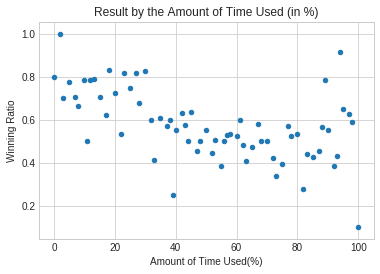

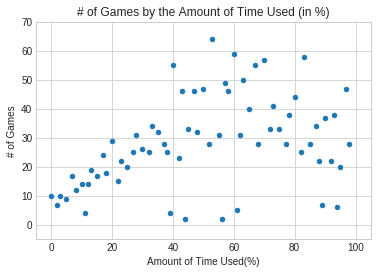

In [39]:
df_mean_by_time_used = df.groupby('time_used').mean()
df_mean_by_time_used.reset_index(inplace=True)
df_count_by_time_used = df.groupby('time_used').count()
df_count_by_time_used.reset_index(inplace=True)
df_mean_by_time_used.plot.scatter(x='time_used', y='result', marker='o',
                                  title='Result by the Amount of Time Used (in %)')
plt.ylabel('Winning Ratio')
plt.xlabel('Amount of Time Used(%)')

df_count_by_time_used.plot.scatter(x='time_used', y='result', legend=False,
                                   title='# of Games by the Amount of Time Used (in %)')
plt.ylim((-5, 70))
plt.ylabel('# of Games')
plt.xlabel('Amount of Time Used(%)')
plt.show()

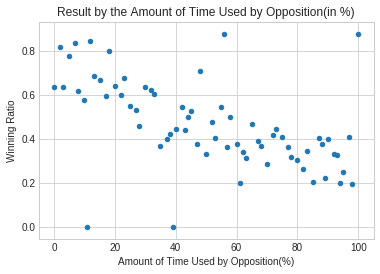

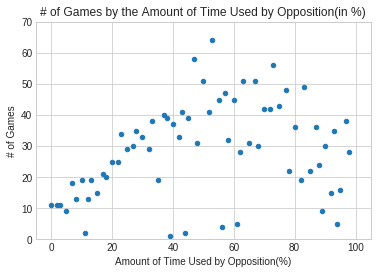

In [56]:
df_mean_by_opp_time_used = df.groupby('opp_time_used').mean()
df_mean_by_opp_time_used.reset_index(inplace=True)
df_count_by_opp_time_used = df.groupby('opp_time_used').count()
df_count_by_opp_time_used.reset_index(inplace=True)
df_mean_by_opp_time_used.plot.scatter(x='opp_time_used', y='result',
                                      title='Result by the Amount of Time Used by Opposition(in %)')
plt.ylabel('Winning Ratio')
plt.xlabel('Amount of Time Used by Opposition(%)')

df_count_by_opp_time_used.plot.scatter(x='opp_time_used', y='result', legend=False,
                                       title='# of Games by the Amount of Time Used by Opposition(in %)')
plt.ylim((0, 70))
plt.ylabel('# of Games')
plt.xlabel('Amount of Time Used by Opposition(%)')
plt.show()